# <span style="color: #69230aff;">🍿 **Popchip Customer Sentiment Analysis Project**</span>

## <span style="color: #8f5a1dff;">Business Objective</span>
As a Data Scientist at Popchip, I'm conducting a comprehensive customer feedback analysis for our new flavor launch to:
- **Assess overall customer satisfaction** with the new product using sentiment analysis
- **Identify specific pain points** requiring immediate attention  
- **Discover positive aspects** to leverage in marketing campaigns
- **Visualize customer emotion patterns** through sentiment-based word clouds
- **Extract actionable keywords** for data-driven marketing optimization
- **Design A/B testing strategies** based on customer sentiment insights
- **Provide strategic recommendations** for product improvement and business growth

## <span style="color: #8f5a1dff;">Comprehensive Methodology</span>
- **VADER Sentiment Analysis**: Measure customer emotion (positive/negative/neutral) with compound scoring
- **Word Cloud Visualization**: 
  - Sentiment-based clouds (positive vs negative words)
  - Frequency-based clouds (most vs least used terms for A/B testing)
- **Text Vectorization**: Count vectorization to identify discussion topics and business insights
- **A/B Testing Strategy**: Data-driven marketing experiments using sentiment and keyword insights
- **Business Intelligence**: Translate NLP outputs into actionable strategic recommendations

## <span style="color: #87CEEB;">1. Data Loading and Exploration</span>

In [4]:
import pandas as pd

df = pd.read_excel('Popchip_Reviews.xlsx')

# Display the first few rows of the dataframe
print("Data Loaded Successfully")
print(f"Shape: {df.shape}\n")


df.head()


Data Loaded Successfully
Shape: (564, 6)



,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
2,23691,A30NYUHEDLWI0Y,5,Low,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
3,23692,A2NU55U9LKTB5J,3,High,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
4,23693,A225F7QFP5LIW2,5,Low,healthy and delicious,These chips are great! They look almost like ...


In [5]:

print(f"=== Data Info ===\n")
df.info()

print(f"\n\n\n=== Number of Null entries per Feature: === \n\n{df.isnull().sum()}")

print(f"\n\n\n=== Features:=== \n\n{df.columns.tolist()}")


=== Data Info ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        564 non-null    int64 
 1   UserId    564 non-null    object
 2   Rating    564 non-null    int64 
 3   Priority  564 non-null    object
 4   Title     564 non-null    object
 5   Text      564 non-null    object
dtypes: int64(2), object(4)
memory usage: 26.6+ KB



=== Number of Null entries per Feature: === 

Id          0
UserId      0
Rating      0
Priority    0
Title       0
Text        0
dtype: int64



=== Features:=== 

['Id', 'UserId', 'Rating', 'Priority', 'Title', 'Text']


---

## <span style="color: #87CEEB;">2. Data Cleaning</span>

*There are no null entries or data.
There are only 6 features- some of which may not be relevant for the purpose of identifying what customers are saying in their (review) feedback on the product*

Features like: 'ID, 'USERID will bne dropped. 

The prioprity Featire may be dropped. Deopending on its substance.

In [6]:
df.head()

,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
2,23691,A30NYUHEDLWI0Y,5,Low,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
3,23692,A2NU55U9LKTB5J,3,High,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
4,23693,A225F7QFP5LIW2,5,Low,healthy and delicious,These chips are great! They look almost like ...


In [7]:
df.Priority.unique()

array(['Low', 'High'], dtype=object)

Appears not to hold any substance.

In [8]:
print(f"Columns: {df.columns.tolist()}\n")

print(f"Data Shape: {df.shape}")

Columns: ['Id', 'UserId', 'Rating', 'Priority', 'Title', 'Text']

Data Shape: (564, 6)


In [9]:
cols_to_del = ['Id', 'UserId', 'Priority']
df.drop(columns=cols_to_del, axis=1, inplace=True)

print(f"New Column List: {df.columns.to_list()}\n")

print(f"New Data Shape: {df.shape}")

New Column List: ['Rating', 'Title', 'Text']

New Data Shape: (564, 3)


In [10]:
df.head()

,Rating,Title,Text
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,5,Great chip that is different from the rest,I like the puffed nature of this chip that mak...
2,5,Great Alternative to Potato Chips,I just love these chips! I was always a big f...
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in..."
4,5,healthy and delicious,These chips are great! They look almost like ...


In [11]:
# Change rating to groups to make it easy to understand.
df.Rating.unique()

array([5, 3, 2, 4, 1])

In [12]:
def group(rating):
    if rating <= 2:
        return 'Dissatisfied'
    elif rating == 3:
        return "Neutral"
    elif rating >= 4:        # ← FIXED: Now includes rating 4!
        return "Satisfied"
    else:
        return "Unknown"
    
df['rating_cat'] = df.Rating.apply(group)

    

---

In [13]:
df.head(5)

,Rating,Title,Text,rating_cat
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,Satisfied
1,5,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,Satisfied
2,5,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,Satisfied
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in...",Neutral
4,5,healthy and delicious,These chips are great! They look almost like ...,Satisfied


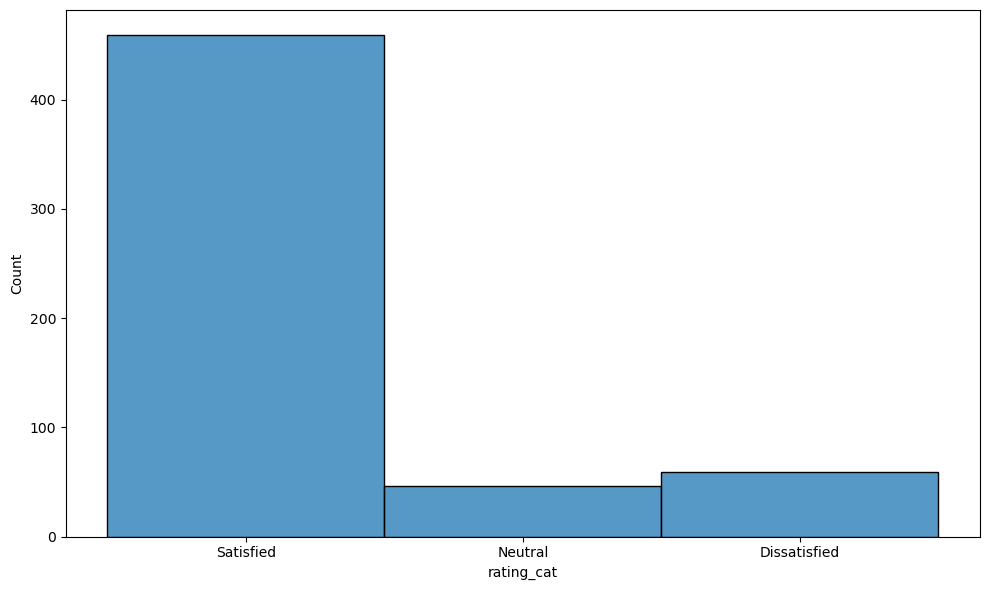

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(x='rating_cat', data=df)
plt.tight_layout()
plt.show()

From the above, the Ratings were 1-5; 1-2 grouped as dissatisfied, 3 as neutral and 4-5 as satisfied. 

- overall the graph shows a total of (calculate the percentage) **x%** is Satisfied- which is a great feedback on the **popchip[if so, which flavour- can it be hued] or new flavour of pochips**

- few people , who mkake up **x%** were neutral and this shows some room to win them over as they stand on the fence. Further analysis may drill into this category to undertsnad their feedback- possibly to win them over to those who are satisfied.
- **x%** are unsatisfaied. However sad- furher analysis willzoom into the reasons [reviews or feedback] of this groiiyup of people.

---

## <span style="color: #87CEEB;">3. Text Preprocessing with Pandas and Spacy</span>
Preparing text data for sentiment analysis and topic modeling.

**Do we need text preprocessing for sentiment analysis? Maybe not.**


*As sentiment analysis feeds off the raw and unprocessed texts- as characters and capital letters also add to the sentiment and interpretation of the texts.*

*However, text preprocessing will be done as the lemmatized and cleaned words will be needed for visualization*

In [15]:
#import libraries and load
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()


#function for lowercasing and characters, and then lemmatization, wtopwords and punctuations
def lower_cha(series):
    series = series.str.lower()
    #to remove  regex </br>
    series = series.str.replace(r'<[^>]+>', '', regex=True) #to remove  regex </br>
    series=series.str.replace(r'\d+', '', regex=True)
    return series

def lemmatize_nonstop(Text):
    doc = nlp(Text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)


#Pipeline function
def spacy_panda_nlp_pipeline(series):
   df['cleaned_text'] = lower_cha(df['Text'])
   df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_nonstop)
   return df

In [16]:
spacy_panda_nlp_pipeline(df['Text'])

,Rating,Title,Text,rating_cat,cleaned_text
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,Satisfied,popchip bomb use parmesan garlic scoop cotta...
1,5,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,Satisfied,like puff nature chip make unique chip market ...
2,5,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,Satisfied,love chip big fan potato chip discover popch...
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in...",Neutral,taste like potatoe stix get grade school lunch...
4,5,healthy and delicious,These chips are great! They look almost like ...,Satisfied,chip great look like flattened rice cake tas...
...,...,...,...,...,...
559,5,Life-saver for chip lovers trying to eat healt...,I love potato chips. I could eat them by the ...,Satisfied,love potato chip eat bagful thank power prov...
560,5,My Favorite Go-To Snack,"When PopChips were really hard to find, I was ...",Satisfied,popchip hard find order case amazon regular ba...
561,5,A healthy alternative,These are a much healthy alternative to most c...,Satisfied,healthy alternative chip taste great great c...
562,5,Luv'em,"These are so good, I've started getting them a...",Satisfied,good start get automatically like original f...


In [17]:
#transform the title to be cleaned as well

df['cleaned_title'] = lower_cha(df['Title'])
df['cleaned_title'] = df['cleaned_title'].apply(lemmatize_nonstop)

df.head()

,Rating,Title,Text,rating_cat,cleaned_text,cleaned_title
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,Satisfied,popchip bomb use parmesan garlic scoop cotta...,yummy snack
1,5,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,Satisfied,like puff nature chip make unique chip market ...,great chip different rest
2,5,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,Satisfied,love chip big fan potato chip discover popch...,great alternative potato chip
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in...",Neutral,taste like potatoe stix get grade school lunch...,somthe crave
4,5,healthy and delicious,These chips are great! They look almost like ...,Satisfied,chip great look like flattened rice cake tas...,healthy delicious


---

## <span style="color: #87CEEB;">4. Sentiment Analysis with VADER</span>

In [18]:
#pip install nltk

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment_analyzer(text):
    if isinstance(text, str):
        score = sid.polarity_scores(text)
        return score['compound']
    else:
        return None
    
print('Sentiment Analyzer Ready')

df['compound_score']= df['Text'].apply(sentiment_analyzer)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kojus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analyzer Ready


In [19]:
print(df.shape)

df.head(3)




(564, 7)


,Rating,Title,Text,rating_cat,cleaned_text,cleaned_title,compound_score
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,Satisfied,popchip bomb use parmesan garlic scoop cotta...,yummy snack,0.9244
1,5,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,Satisfied,like puff nature chip make unique chip market ...,great chip different rest,0.7269
2,5,Great Alternative to Potato Chips,I just love these chips! I was always a big f...,Satisfied,love chip big fan potato chip discover popch...,great alternative potato chip,0.9790


*Although, there's a current category of the rating score- but both explicit customer ratings and implicit sentiment scores willb be essential for comprehensive analysis.*

*The explicit ratings provide clear categorical snapshots, while the implicit sentiment scores enable granular ranking within each category. The explicit ratings compress 5-point scales into 3 broad categories, but the sentiment scores allow us to identify the most and least extreme cases within those categories.*

*For example, within the neutral category, we can identify customers who lean more negative versus those who are truly neutral - something the explicit rating alone cannot reveal. This dual approach enables deeper segmentation and more targeted analysis within each satisfaction category.*

In [20]:
def categorize_sentiment(score):
    if score >= 0.5:
        return 'Positive'
    elif score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_cat'] = df['compound_score'].apply(categorize_sentiment)

df.columns

Index(['Rating', 'Title', 'Text', 'rating_cat', 'cleaned_text',
       'cleaned_title', 'compound_score', 'sentiment_cat'],
      dtype='object')

---

## <span style="color: #87CEEB;">5. Insights and Analysis</span> 

### <span style="color: #7bd3dbff;">**Insights for R&D**</span>

### Deep-Dive Analysis on Top Flavor and Key Taste Terms

This analysis combines the most discussed flavor with key taste terms to identify:
- Customer satisfaction patterns for each flavor
- Best performing flavors for marketing leverage
- Problem areas requiring immediate attention
- Specific customer feedback examples for R&D insights

*The explicit rating would mostly be used to dissect the flavour popularity- as it directly refelcts the customers conscious rating. Also, it's clear and easier to interpret by business stakeholders. It's more business-friendly and actionable.*

In [21]:
print("=" * 80 )

In [28]:
import pandas as pd
import re

def search_reviews_by_terms(df, search_terms):
    """
    Search for reviews containing specific terms and return results as DataFrame
    """
    # Create search pattern (case insensitive)
    search_pattern = '|'.join(search_terms)
    
    # Search in both Text and Title columns for comprehensive results
    mask = (df['Text'].str.contains(search_pattern, case=False, na=False) | 
            df['Title'].str.contains(search_pattern, case=False, na=False))
    
    return df[mask].copy()

# Define all possible flavor terms
all_flavor_terms = [
    'salt vinegar', 'salt pepper', 'chili lime', 'chilli lime', 'sea salt',
    'vinegar', 'bbq', 'barbecue', 'cheddar', 'cheese', 'sour cream', 
    'garlic', 'parmesan', 'original', 'plain', 'sweet potato'
]

# Analyze each flavor and store results
flavor_data = []

for flavor in all_flavor_terms:
    flavor_results = search_reviews_by_terms(df, [flavor])
    mentions = len(flavor_results)
    
    if mentions > 0:
        avg_rating = round(flavor_results['Rating'].mean(), 2)
        
        # Break down mentions into explicit rating categories
        satisfied_count = len(flavor_results[flavor_results['rating_cat'] == 'Satisfied'])
        neutral_count = len(flavor_results[flavor_results['rating_cat'] == 'Neutral'])
        dissatisfied_count = len(flavor_results[flavor_results['rating_cat'] == 'Dissatisfied'])
        
        satisfied_pct = round((satisfied_count / mentions) * 100, 1)
        
        # Get sample reviews for insights
        best_reviews = flavor_results.nlargest(3, ['Rating', 'compound_score'])
        concerning_reviews = flavor_results.nsmallest(3, ['Rating', 'compound_score'])
        
        best_review_titles = ' | '.join(best_reviews['Title'].head(3).tolist())
        concerning_review_titles = ' | '.join(concerning_reviews['Title'].head(3).tolist())
        
        flavor_data.append({
            'Flavor': flavor.title(),
            'Mentions': mentions,
            'Avg_Rating': avg_rating,
            'Satisfied': satisfied_count,
            'Neutral': neutral_count,
            'Dissatisfied': dissatisfied_count,
            'Satisfied_%': satisfied_pct,
            'Top_Review_Titles': best_review_titles,
            'Concerning_Review_Titles': concerning_review_titles
        })

# Create single comprehensive DataFrame and sort by mentions
if flavor_data:
    comprehensive_flavor_table = pd.DataFrame(flavor_data)
    comprehensive_flavor_table = comprehensive_flavor_table.sort_values('Mentions', ascending=False)
    
    print("COMPREHENSIVE FLAVOR PERFORMANCE TABLE:")
    print("=" * 100)
    
    # Display the complete DataFrame
    display(comprehensive_flavor_table)
    
    # Identify top flavor
    top_flavor = comprehensive_flavor_table.iloc[0]['Flavor']
    top_mentions = comprehensive_flavor_table.iloc[0]['Mentions']
    top_rating = comprehensive_flavor_table.iloc[0]['Avg_Rating']
    top_satisfied = comprehensive_flavor_table.iloc[0]['Satisfied']
    top_satisfied_pct = comprehensive_flavor_table.iloc[0]['Satisfied_%']
    
    print(f"\nTOP FLAVOR: {top_flavor.upper()}")
    print(f"   {top_mentions} mentions | {top_rating}/5 rating")
    print(f"   {top_satisfied} satisfied customers ({top_satisfied_pct}%)")
    
else:
    print("No specific flavors found in reviews")
    print("Treating as general product analysis")
    comprehensive_flavor_table = pd.DataFrame()

# Return the single comprehensive table
comprehensive_flavor_table

COMPREHENSIVE FLAVOR PERFORMANCE TABLE:


,Flavor,Mentions,Avg_Rating,Satisfied,Neutral,Dissatisfied,Satisfied_%,Top_Review_Titles,Concerning_Review_Titles
3,Bbq,90,4.48,78,6,6,86.7,This picky eater loves them! | Love them & I'm...,Too strong IMO | Is this food? | Not a fan of ...
2,Vinegar,80,4.03,60,4,16,75.0,This picky eater loves them! | Love them & I'm...,TRASH-Too much VINeGaR and NO Chips teste-24 B...
12,Sweet Potato,65,4.35,57,5,3,87.7,I loved them! | Addictive! | Sweet Potato Popc...,Not a fan of the Sweet Potato Pop Chips | Lack...
10,Original,60,4.25,49,2,9,81.7,This picky eater loves them! | Love them & I'm...,"To me, ""Original"" flavor just nasty tasting. |..."
5,Cheddar,43,4.33,37,0,6,86.0,This picky eater loves them! | Love them & I'm...,just awful | Never tasted cheddar cheese like ...
11,Plain,39,4.15,28,7,4,71.8,Great Chips Less Fat | Yummy low cal chip | Th...,Gross! | Original PopChips | Did NOT like the ...
1,Sea Salt,37,4.24,31,2,4,83.8,This picky eater loves them! | Love them & I'm...,TRASH-Too much VINeGaR and NO Chips teste-24 B...
7,Sour Cream,32,4.44,27,3,2,84.4,This picky eater loves them! | Love them & I'm...,Edible | Decent | Not as good as BBQ
8,Garlic,32,4.22,25,2,5,78.1,This picky eater loves them! | Love them & I'm...,"Other Flavors are Great, these Not So Much | C..."
0,Chili Lime,24,3.83,14,8,2,58.3,Tasty | Excellent! | Where have you been all m...,Not as good as I'd hoped | Disappointing | Pop...



TOP FLAVOR: BBQ
   90 mentions | 4.48/5 rating
   78 satisfied customers (86.7%)


,Flavor,Mentions,Avg_Rating,Satisfied,Neutral,Dissatisfied,Satisfied_%,Top_Review_Titles,Concerning_Review_Titles
3,Bbq,90,4.48,78,6,6,86.7,This picky eater loves them! | Love them & I'm...,Too strong IMO | Is this food? | Not a fan of ...
2,Vinegar,80,4.03,60,4,16,75.0,This picky eater loves them! | Love them & I'm...,TRASH-Too much VINeGaR and NO Chips teste-24 B...
12,Sweet Potato,65,4.35,57,5,3,87.7,I loved them! | Addictive! | Sweet Potato Popc...,Not a fan of the Sweet Potato Pop Chips | Lack...
10,Original,60,4.25,49,2,9,81.7,This picky eater loves them! | Love them & I'm...,"To me, ""Original"" flavor just nasty tasting. |..."
5,Cheddar,43,4.33,37,0,6,86.0,This picky eater loves them! | Love them & I'm...,just awful | Never tasted cheddar cheese like ...
11,Plain,39,4.15,28,7,4,71.8,Great Chips Less Fat | Yummy low cal chip | Th...,Gross! | Original PopChips | Did NOT like the ...
1,Sea Salt,37,4.24,31,2,4,83.8,This picky eater loves them! | Love them & I'm...,TRASH-Too much VINeGaR and NO Chips teste-24 B...
7,Sour Cream,32,4.44,27,3,2,84.4,This picky eater loves them! | Love them & I'm...,Edible | Decent | Not as good as BBQ
8,Garlic,32,4.22,25,2,5,78.1,This picky eater loves them! | Love them & I'm...,"Other Flavors are Great, these Not So Much | C..."
0,Chili Lime,24,3.83,14,8,2,58.3,Tasty | Excellent! | Where have you been all m...,Not as good as I'd hoped | Disappointing | Pop...


In [23]:
print("=" * 80 )

### **Customer Review Examples**

The following code extracts specific customer feedback examples for each flavor/term analyzed. This provides qualitative insights to complement the quantitative analysis above, showing actual customer language and concerns for R&D consideration.

----

### <span style="color: #b29fd6ff;">**Insights for Marketing**</span>

CREATING MARKETING TEAM EXPORT...
MARKETING INSIGHTS SUMMARY:
                               Metric  Count Percentage
           Highly Satisfied Customers    410      72.7%
Neutral Customers (Conversion Target)     46       8.2%
               Dissatisfied Customers     59      10.5%


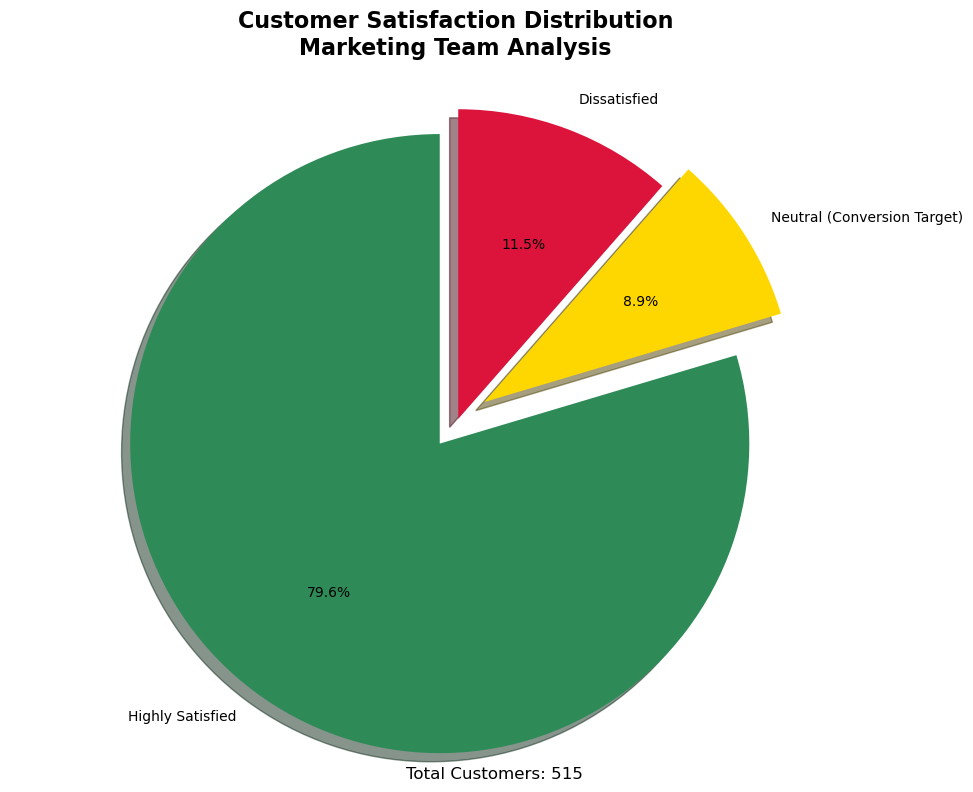


CUSTOMER DISTRIBUTION BREAKDOWN:
          Customer_Category  Count Percentage                         Marketing_Action
           Highly Satisfied    410      79.6% Leverage for testimonials & social proof
Neutral (Conversion Target)     46       8.9%          Target for conversion campaigns
               Dissatisfied     59      11.5%           Address concerns for retention

TOP MARKETING PHRASES FROM CUSTOMER TITLES:
SOURCE: Customer Review Titles


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# ================================================================================
# MARKETING TEAM EXPORT: POSITIVE MESSAGING & CONVERSION OPPORTUNITIES
# ================================================================================

print("CREATING MARKETING TEAM EXPORT...")
print("=" * 80)

# Focus on highly satisfied customers (Positive sentiment + Satisfied rating)
highly_satisfied = df[(df['sentiment_cat'] == 'Positive') & (df['rating_cat'] == 'Satisfied')]
neutral_customers = df[df['rating_cat'] == 'Neutral']
dissatisfied_customers = df[df['rating_cat'] == 'Dissatisfied']

# Create marketing insights summary table
marketing_insights = pd.DataFrame([
    {'Metric': 'Highly Satisfied Customers', 'Count': len(highly_satisfied), 'Percentage': f"{len(highly_satisfied)/len(df)*100:.1f}%"},
    {'Metric': 'Neutral Customers (Conversion Target)', 'Count': len(neutral_customers), 'Percentage': f"{len(neutral_customers)/len(df)*100:.1f}%"},
    {'Metric': 'Dissatisfied Customers', 'Count': len(dissatisfied_customers), 'Percentage': f"{len(dissatisfied_customers)/len(df)*100:.1f}%"}
])

print("MARKETING INSIGHTS SUMMARY:")
print("=" * 50)
print(marketing_insights.to_string(index=False))

# Create pie chart for customer satisfaction distribution
plt.figure(figsize=(10, 8))

# Data for pie chart
categories = ['Highly Satisfied', 'Neutral (Conversion Target)', 'Dissatisfied']
counts = [len(highly_satisfied), len(neutral_customers), len(dissatisfied_customers)]
colors = ['#2E8B57', '#FFD700', '#DC143C']  # Green, Gold, Red
explode = (0.1, 0.1, 0)  # Explode satisfied and neutral slices

# Create pie chart
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, explode=explode, 
        startangle=90, shadow=True)

plt.title('Customer Satisfaction Distribution\nMarketing Team Analysis', 
          fontsize=16, fontweight='bold', pad=20)

# Add total count
plt.figtext(0.5, 0.02, f'Total Customers: {sum(counts)}', ha='center', fontsize=12)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Display summary statistics table
print("\nCUSTOMER DISTRIBUTION BREAKDOWN:")
print("=" * 60)
summary_table = pd.DataFrame({
    'Customer_Category': categories,
    'Count': counts,
    'Percentage': [f"{(count/sum(counts)*100):.1f}%" for count in counts],
    'Marketing_Action': [
        'Leverage for testimonials & social proof',
        'Target for conversion campaigns', 
        'Address concerns for retention'
    ]
})
print(summary_table.to_string(index=False))

# Extract top marketing phrases from TITLES with highest sentiment scores
print("\nTOP MARKETING PHRASES FROM CUSTOMER TITLES:")
print("=" * 60)
print("SOURCE: Customer Review Titles")

In [ ]:
import pandas as pd

# Get top marketing review titles
rating_5 = df[(df['sentiment_cat'] == 'Positive') & (df['Rating'] == 5)]
rating_4 = df[(df['sentiment_cat'] == 'Positive') & (df['Rating'] == 4)]

if len(rating_5) >= 15:
    top_reviews = rating_5.nlargest(15, 'compound_score')
else:
    remaining_needed = 15 - len(rating_5)
    top_reviews = pd.concat([
        rating_5.nlargest(len(rating_5), 'compound_score'),
        rating_4.nlargest(remaining_needed, 'compound_score')
    ])

marketing_table = pd.DataFrame({
    'Review_Title': top_reviews['Title'],
    'Sentiment_Score': round(top_reviews['compound_score'], 4),
    'Customer_Rating': top_reviews['Rating']
})

print("TOP MARKETING REVIEW TITLES:")
print("=" * 50)
print(marketing_table.to_string(index=False))

marketing_table.to_excel('Marketing_Review_Titles.xlsx', index=False)
print(f"\nExported {len(marketing_table)} review titles to Marketing_Review_Titles.xlsx")

TOP MARKETING REVIEW TITLES:
                                                     Review_Title  Sentiment_Score  Customer_Rating
                                                    I loved them!           0.9988                5
                                     This picky eater loves them!           0.9979                5
                                    Love them & I'm a picky eater           0.9979                5
                                From a picky eater - I love these           0.9979                5
Not exactly like traditional potato chips, but a great substitute           0.9974                5
                                             Great Chips Less Fat           0.9967                5
                                               Yummy low cal chip           0.9959                5
                                                       Addictive!           0.9957                5
               Life-saver for chip lovers trying to eat healthier      

In [ ]:
# NEUTRAL CUSTOMER ANALYSIS
print("\nNEUTRAL CUSTOMER CONVERSION INSIGHTS:")
print("=" * 50)

neutral_customers = df[df['rating_cat'] == 'Neutral']

if len(neutral_customers) > 0:
    # Get top 15 neutral customers with lowest sentiment scores (closest to negative)
    top_15_concerning_neutral = neutral_customers.nsmallest(20, 'compound_score')[['Title', 'compound_score', 'Text']]
    
    neutral_analysis_table = pd.DataFrame({
        'Review_Title': top_15_concerning_neutral['Title'],
        'Sentiment_Score': round(top_15_concerning_neutral['compound_score'], 4),
        'Review_Text': top_15_concerning_neutral['Text']
    })
    
    print("TOP 20 NEUTRAL CUSTOMERS WITH LOWEST SENTIMENT SCORES:")
    print("=" * 80)
    
    # Display as DataFrame table (instead of string format)
    display(neutral_analysis_table)
    
    # Export to Excel
    neutral_analysis_table.to_excel('Neutral_Customer_Analysis.xlsx', index=False)
    print(f"\nExported {len(neutral_analysis_table)} neutral customer reviews to Neutral_Customer_Analysis.xlsx")
    
    print(f"\nNEUTRAL CUSTOMER COUNT: {len(neutral_customers)}")
else:
    print("No neutral customers found in the dataset")


NEUTRAL CUSTOMER CONVERSION INSIGHTS:
TOP 20 NEUTRAL CUSTOMERS WITH LOWEST SENTIMENT SCORES:


,Review_Title,Sentiment_Score,Review_Text
96,Tastes Like Celery,-0.8837,"I really like pop chips, but this flavor isn't..."
137,Pop chips Chili Lime flavor,-0.6377,I really didn't care much for this flavor or s...
67,Only 2 points for Weight Watchers,-0.5978,I order these chips on a regular basis. I lik...
113,Popchip fail,-0.5812,These popchips both taste and smell horrible. ...
153,its okay,-0.3863,i dont get the big deal. First of all they are...
550,"Taste more like ""Tomato and Basil"" than ""Chili...",-0.3488,NOTE: This review is for the Chili and Lime Fl...
166,So So,-0.0539,"I have to agree with the recent reviews, these..."
203,not as good as BBQ flavor,0.0000,BBQ was out-of-stock when our subscription ord...
472,"OK, but not fabulous",0.0000,"The seasoning is too heavy. I will eat them, b..."
145,"A Great Crunch, but a Poor Flavor",0.0880,I love the texture of these crisps. They have...



Exported 20 neutral customer reviews to Neutral_Customer_Analysis.xlsx

NEUTRAL CUSTOMER COUNT: 46


---   

## <span style="color: #87CEEB;">6. Business Analysis: Sentiment + Text Insights</span>
